In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/alvishaflorineveigas/battery-data-csv/battery_data.csv.xlsx


In [3]:
import pandas as pd

data = pd.read_excel('/kaggle/input/datasets/alvishaflorineveigas/battery-data-csv/battery_data.csv.xlsx')

data.head()

,voltage,current,temperature,SOC
0,3.7,1.2,30,80
1,3.6,1.3,31,78
2,3.5,1.4,32,76
3,3.4,1.5,33,75
4,3.3,1.6,34,72


In [4]:
print(data.columns)


Index(['voltage', 'current', 'temperature', 'SOC'], dtype='object')


In [10]:
X = data[['voltage','current','temperature']]
y = data['SOC']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))

MAE: 2.3150000000000013
R2 Score: 0.7493829787234041


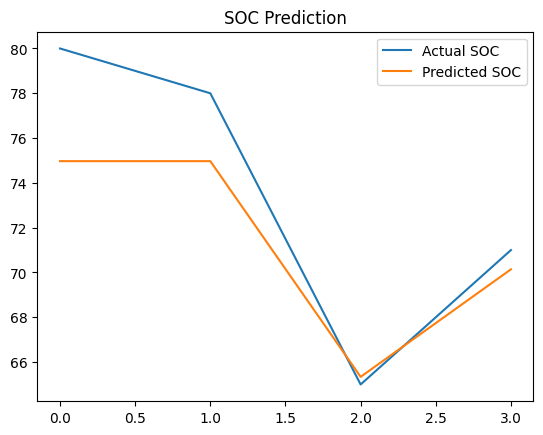

In [17]:
import matplotlib.pyplot as plt

plt.plot(y_test.values[:50], label='Actual SOC')
plt.plot(pred[:50], label='Predicted SOC')

plt.legend()
plt.title("SOC Prediction")
plt.show()